Specific Web Site for the specific image
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4482424/figure/pone.0130934.g004/

Peer Reviewed Publication
https://www.ncbi.nlm.nih.gov/pubmed/26110790

Web Site that has the dataset
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE58471

In [1]:
#Installs the necessary packages
suppressPackageStartupMessages(suppressWarnings(suppressMessages(source("http://bioconductor.org/biocLite.R"))))
suppressPackageStartupMessages(suppressWarnings(suppressMessages(biocLite("GEOquery"))))

In [2]:
#Loads the packages
suppressPackageStartupMessages(suppressWarnings(suppressMessages(library("GEOquery"))))
suppressPackageStartupMessages(suppressWarnings(suppressMessages(library(tidyverse))))

In [3]:
#Loads the gene expression dataset
geoID = "GSE58471"
expressionSet = suppressPackageStartupMessages(suppressWarnings(suppressMessages(getGEO(GEO = geoID, GSEMatrix = TRUE, getGPL = TRUE, AnnotGPL = TRUE))))
expressionSet = expressionSet[[1]]
expressionData = assayData(expressionSet)$exprs

In [6]:
#Load the metaData from dataset
metaData = as.data.frame(pData(expressionSet), stringsAsFactors=FALSE)

In [7]:
#Filter it so we just have the males
#also save vectors with location and season
gender = metaData$`gender:ch1`
males = which(gender == "male")
loc = metaData$`location:ch1`[males]
season = metaData$`season:ch1`[males]
dolphinData = t(expressionData)
dolphinDataMales = dolphinData[males,]

In [8]:
#perform Principal Component Analysis
pcDolphin = prcomp(dolphinDataMales, center = TRUE, scale = TRUE)

#check the explained variance for our each Principal Components
percentVE = 100 * pcDolphin$sdev^2 / sum(pcDolphin$sdev^2)


In [9]:
#Combine the Principal Components with location and season data
pcDolphinDataFrame = as.data.frame(pcDolphin$x)
pcDolphinDataFrame = cbind(pcDolphinDataFrame, loc, season)

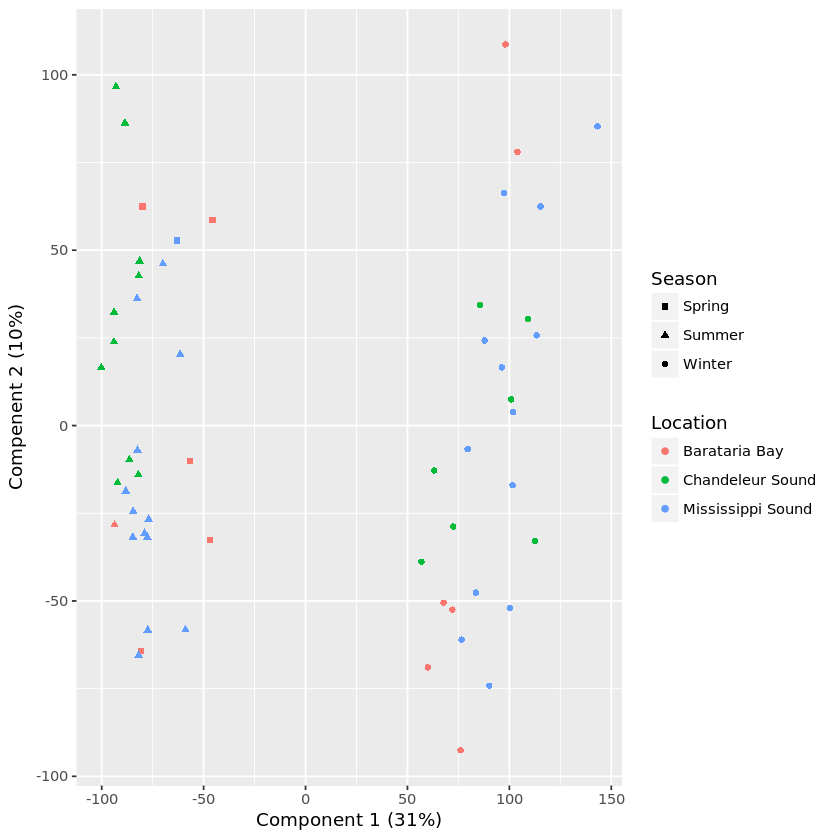

In [10]:
#Create the PCA plot with PC1 and PC2
ggplot(pcDolphinDataFrame, aes(x = PC1, y = PC2)) + 
  geom_point(aes(color = loc, shape = season))+
  labs(col = "Location", shape = "Season")+
  xlab(paste0("Component 1 (", round(percentVE[1]), "%)"))+
  ylab(paste0("Compenent 2 (", round(percentVE[2]), "%)")) +
  scale_shape_manual(values = c(15,17, 16))